# CS3033/CS6405 - Data Mining - Second Assignment

### Submission

This assignment is **due on 06/04/22 at 23:59**. You should submit a single .ipnyb file with your python code and analysis electronically via Canvas.
Please note that this assignment will account for 25 Marks of your module grade.

### Declaration

By submitting this assignment. I agree to the following:

<font color="red">“I have read and understand the UCC academic policy on plagiarism, and agree to the requirements set out thereby in relation to plagiarism and referencing. I confirm that I have referenced and acknowledged properly all sources used in the preparation of this assignment.
I declare that this assignment is entirely my own work based on my personal study. I further declare that I have not engaged the services of another to either assist me in, or complete this assignment”</font>

### Objective

The Boolean satisfiability (SAT) problem consists in determining whether a Boolean formula F is satisfiable or not. F is represented by a pair (X, C), where X is a set of Boolean variables and C is a set of clauses in Conjunctive Normal Form (CNF). Each clause is a disjunction of literals (a variable or its negation). This problem is one of the most widely studied combinatorial problems in computer science. It is the classic NP-complete problem. Over the past number of decades, a significant amount of research work has focused on solving SAT problems with both complete and incomplete solvers.

Recent advances in supervised learning have provided powerful techniques for classifying problems. In this project, we see the SAT problem as a classification problem. Given a Boolean formula (represented by a vector of features), we are asked to predict if it is satisfiable or not.

In this project, we represent SAT problems with a vector of 327 features with general information about the problem, e.g., number of variables, number of clauses, fraction of horn clauses in the problem, etc. There is no need to understand the features to be able to complete the assignment.

The dataset is available at:
https://github.com/andvise/DataAnalyticsDatasets/blob/main/dm_assignment2/sat_dataset_train.csv

This is original unpublished data.

## Data Preparation

In [1]:
from pandas.io.formats.info import DataFrameInfo
import pandas as pd
import numpy as np

df = pd.read_csv("https://github.com/andvise/DataAnalyticsDatasets/blob/6d5738101d173b97c565f143f945dedb9c42a400/dm_assignment2/sat_dataset_train.csv?raw=true")

value = df.quantile(0.98)

df=df.round(decimals = 2)
#df = df.replace(np.inf, value)
#df = df.replace(-np.inf, value)
df.replace([np.inf, -np.inf], np.nan,inplace=True)

df.fillna(0,inplace=True)
#df = df.drop(['saps_EstACL_Mean'], axis=1)

df





,c,v,clauses_vars_ratio,vars_clauses_ratio,vcg_var_mean,vcg_var_coeff,vcg_var_min,vcg_var_max,vcg_var_entropy,vcg_clause_mean,...,rwh_0_max,rwh_1_mean,rwh_1_coeff,rwh_1_min,rwh_1_max,rwh_2_mean,rwh_2_coeff,rwh_2_min,rwh_2_max,target
0,420,10,42.00,0.02,0.60,0.00,0.60,0.60,0.00,0.60,...,78750.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,1
1,230,20,11.50,0.09,0.14,0.09,0.12,0.16,2.18,0.14,...,6646875.0,17433.72,1.0,0.00,34867.44,17277.21,1.0,0.00,34554.42,0
2,240,16,15.00,0.07,0.30,0.00,0.30,0.30,0.00,0.30,...,500000.0,1525.88,0.0,1525.88,1525.88,1525.88,0.0,1525.88,1525.88,1
3,424,30,14.13,0.07,0.23,0.49,0.06,0.45,2.22,0.23,...,87500.0,0.00,1.0,0.00,0.00,0.00,1.0,0.00,0.00,0
4,162,19,8.53,0.12,0.14,0.12,0.11,0.19,1.94,0.14,...,5859400.0,16591.49,1.0,0.00,33182.99,16659.03,1.0,0.00,33318.07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,910,50,18.20,0.05,0.05,0.20,0.02,0.07,3.20,0.05,...,7031250.0,5937.50,1.0,0.00,11874.99,5759.32,1.0,0.00,11518.64,1
1925,440,30,14.67,0.07,0.23,0.46,0.05,0.44,2.24,0.23,...,29000.0,0.00,1.0,0.00,0.00,0.00,1.0,0.00,0.00,0
1926,372,28,13.29,0.08,0.10,0.08,0.08,0.11,2.01,0.10,...,6640650.0,11547.13,1.0,0.00,23094.26,11366.08,1.0,0.00,22732.16,0
1927,821,181,4.54,0.22,0.02,0.03,0.02,0.02,0.70,0.02,...,3515625.0,107.31,1.0,0.00,214.62,107.31,1.0,0.00,214.62,1


In [2]:
df.dtypes
df

,c,v,clauses_vars_ratio,vars_clauses_ratio,vcg_var_mean,vcg_var_coeff,vcg_var_min,vcg_var_max,vcg_var_entropy,vcg_clause_mean,...,rwh_0_max,rwh_1_mean,rwh_1_coeff,rwh_1_min,rwh_1_max,rwh_2_mean,rwh_2_coeff,rwh_2_min,rwh_2_max,target
0,420,10,42.00,0.02,0.60,0.00,0.60,0.60,0.00,0.60,...,78750.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,1
1,230,20,11.50,0.09,0.14,0.09,0.12,0.16,2.18,0.14,...,6646875.0,17433.72,1.0,0.00,34867.44,17277.21,1.0,0.00,34554.42,0
2,240,16,15.00,0.07,0.30,0.00,0.30,0.30,0.00,0.30,...,500000.0,1525.88,0.0,1525.88,1525.88,1525.88,0.0,1525.88,1525.88,1
3,424,30,14.13,0.07,0.23,0.49,0.06,0.45,2.22,0.23,...,87500.0,0.00,1.0,0.00,0.00,0.00,1.0,0.00,0.00,0
4,162,19,8.53,0.12,0.14,0.12,0.11,0.19,1.94,0.14,...,5859400.0,16591.49,1.0,0.00,33182.99,16659.03,1.0,0.00,33318.07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,910,50,18.20,0.05,0.05,0.20,0.02,0.07,3.20,0.05,...,7031250.0,5937.50,1.0,0.00,11874.99,5759.32,1.0,0.00,11518.64,1
1925,440,30,14.67,0.07,0.23,0.46,0.05,0.44,2.24,0.23,...,29000.0,0.00,1.0,0.00,0.00,0.00,1.0,0.00,0.00,0
1926,372,28,13.29,0.08,0.10,0.08,0.08,0.11,2.01,0.10,...,6640650.0,11547.13,1.0,0.00,23094.26,11366.08,1.0,0.00,22732.16,0
1927,821,181,4.54,0.22,0.02,0.03,0.02,0.02,0.70,0.02,...,3515625.0,107.31,1.0,0.00,214.62,107.31,1.0,0.00,214.62,1


In [3]:
df['target'].value_counts()

1    976
0    953
Name: target, dtype: int64

In [4]:
# YOUR CODE HERE
df1= df
y= df['target']
x = df1.iloc[: , :-1]


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=1)

print(y_test)


48      0
1283    0
1163    1
941     1
309     1
       ..
1561    1
142     0
1613    0
1057    1
1138    0
Name: target, Length: 579, dtype: int64


# Tasks

## Basic models and evaluation (5 Marks)

Using Scikit-learn, train and evaluate K-NN and decision tree classifiers using 70% of the dataset from training and 30% for testing. For this part of the project, we are not interested in optimising the parameters; we just want to get an idea of the dataset. Compare the results of both classifiers.

[236, 52, 51, 240]
Accuracy for KNN:  0.8221070811744386
[287, 1, 5, 286]
Accuracy For Decision Tree:  0.9896373056994818
Roc Score 0.8221087298935612
[0.8186528497409327, 0.772020725388601, 0.7875647668393783, 0.7737478411053541, 0.7616580310880829, 0.7530224525043178, 0.7564766839378239, 0.7633851468048359, 0.7409326424870466, 0.7495682210708118, 0.7271157167530224, 0.7409326424870466, 0.7512953367875648, 0.7322970639032815]


Text(0, 0.5, 'Accuracy')

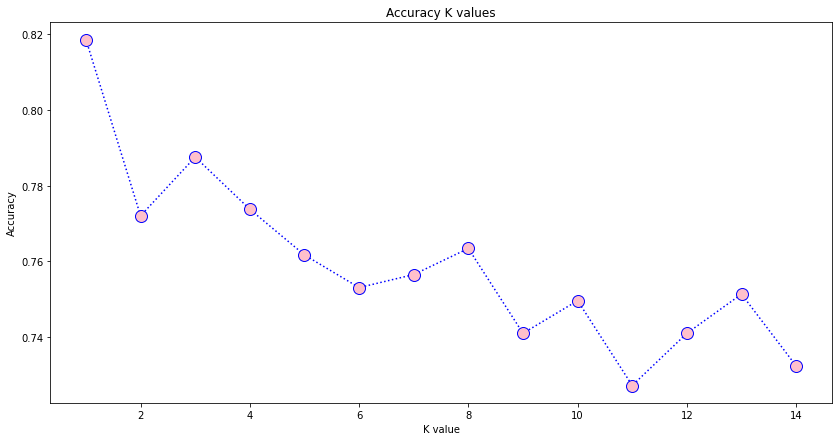

In [5]:
# YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit(x_train)
x_train_val=standard_scaler.transform(x_train)
x_test_val=standard_scaler.transform(x_test)



knn = KNeighborsClassifier(n_neighbors = 1,  metric='manhattan')
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

from sklearn.metrics import confusion_matrix

confusion_matrix_main = confusion_matrix(y_test,y_pred).ravel().tolist()
print(confusion_matrix_main)
accuracy= (confusion_matrix_main[0]+confusion_matrix_main[3]) / (confusion_matrix_main[0]+confusion_matrix_main[1]+confusion_matrix_main[2]+confusion_matrix_main[3])
print("Accuracy for KNN: ",accuracy)

from sklearn import tree
from sklearn.model_selection import cross_val_score

decisiontree = tree.DecisionTreeClassifier(criterion='entropy')
decisiontree.fit(x_train,y_train)

y_predict_decision_tree = decisiontree.predict(x_test)

confusion_matrix_main2 = confusion_matrix(y_test,y_predict_decision_tree).ravel().tolist()
print(confusion_matrix_main2)
accuracy2= (confusion_matrix_main2[0]+confusion_matrix_main2[3]) / (confusion_matrix_main2[0]+confusion_matrix_main2[1]+confusion_matrix_main2[2]+confusion_matrix_main2[3])
print("Accuracy For Decision Tree: ",accuracy2)

from sklearn.metrics import roc_auc_score

print("Roc Score",roc_auc_score(y_pred,y_test))

accuracyknn = []

# Calculating error for K values between 1 and 40
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    accuracyknn.append(np.mean(pred_i == y_test))

print(accuracyknn)

#lets plot some summary for accuracy of K values between 1 to 15 and check the optimal values.

import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(range(1,15),accuracyknn,color='blue',linestyle='dotted',marker='o',markerfacecolor='pink',markersize='12')

plt.title("Accuracy K values")
plt.xlabel("K value")
plt.ylabel("Accuracy")

## Robust evaluation (10 Marks)

In this section, we are interested in more rigorous techniques by implementing more sophisticated methods, for instance:
* Hold-out and cross-validation.
* Hyper-parameter tuning.
* Feature reduction.
* Feature normalisation.

Your report should provide concrete information of your reasoning; everything should be well-explained.

Do not get stressed if the things you try do not improve the accuracy. The key to geting good marks is to show that you evaluated different methods and that you correctly selected the configuration.

In [11]:
from sklearn import neighbors
from sklearn import metrics
# YOUR CODE HERE
#Hold Out and Cross Validation
#Here K fold cross validation is used
from sklearn.model_selection import cross_val_score
#knn2=KNeighborsClassifier()
#print(knn2)
knn_score = cross_val_score(knn,x_train,y_train,cv=10)
decision_tree_cross_validation_score = cross_val_score(decisiontree,x,y,cv=10)

print(knn_score)
print(decision_tree_cross_validation_score)
print("Mean Cross Validation Score For KNN with k folds: ",knn_score.mean())
print("Mean Cross Validation Score For Decision Tree with k folds: ",decision_tree_cross_validation_score.mean())

#For Hyperparameter tuning we are considering grid search cv
from sklearn.model_selection import GridSearchCV
#hyperparameters require for knn'
#The hyperparameter for knn is choosen as number of k values and distance metric in sklearn the distance metric is termed as p and if p=1 the distance is manhattan, if p=2, the distance metric is euclidian

n_neighbors = list(range(1,20))
distance_metric=[1,2]

hypermarameter = dict(n_neighbors = n_neighbors,p=distance_metric)

knn_check= KNeighborsClassifier()
#reference: https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

gridcv= GridSearchCV(knn,hypermarameter,cv=10)
best_model = gridcv.fit(x_train,y_train)
print("Best value of K:",best_model.best_estimator_.get_params()['n_neighbors'])

print("Best Distance Metric:",best_model.best_estimator_.get_params()['p'])
knn_prediction = gridcv.predict(x_test)
print("Accuracy for knn Tree After Hyperparameter Tuning : ",metrics.accuracy_score(y_test,knn_prediction))



#hyperparameter tuning for decision tree using gridcv
#here we will using two hyperparameters. One is criterion metric that has two values gini index and another one is information Gain
# and another hyperparameter will be the max depth.

criterion = ['gini','entropy']
max_depth=list(range(1,15))

hyperparameter_decision_tree = dict(criterion=criterion,max_depth=max_depth)

gridcvdecisiontree = GridSearchCV(decisiontree,hyperparameter_decision_tree,cv=10)
best_tree = gridcvdecisiontree.fit(x_train,y_train)

dt_prediction = gridcvdecisiontree.predict(x_test)

print("Best split criterion:",best_tree.best_estimator_.get_params()['criterion'])

print("Optimum Maximum Depth of Tree:",best_tree.best_estimator_.get_params()['max_depth'])

print("Accuracy for Decision Tree After Hyperparameter Tuning : ",metrics.accuracy_score(y_test,dt_prediction))


# Feature Reduction
# For feature reduction we are considering here two techniques: PCA,LDA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline

pca_knn = make_pipeline(StandardScaler(),PCA(n_components=2,random_state=0))
pca_knn.fit(x_train)
x_train_pca_scaled = pca_knn.transform(x_train)
x_test_pca_scaled = pca_knn.transform(x_test)

# knn

knn.fit(x_train_pca_scaled,y_train)

prediction_pca= knn.predict(x_test_pca_scaled)

from sklearn.metrics import confusion_matrix

confusion_matrix_main_pca = confusion_matrix(y_test,prediction_pca).ravel().tolist()
print(confusion_matrix_main_pca)
accuracy_pca= (confusion_matrix_main_pca[0]+confusion_matrix_main_pca[3]) / (confusion_matrix_main_pca[0]+confusion_matrix_main_pca[1]+confusion_matrix_main_pca[2]+confusion_matrix_main_pca[3])
print("Accuracy for KNN after dimensionality reduction to 2 by PCA: ",accuracy_pca)

# decision tree
decisiontree.fit(x_train_pca_scaled,y_train)
predict_dt_pca= decisiontree.predict(x_test_pca_scaled)

from sklearn.metrics import confusion_matrix

confusion_matrix_main_dt_pca = confusion_matrix(y_test,predict_dt_pca).ravel().tolist()
print(confusion_matrix_main_dt_pca)
accuracy_pca_dt= (confusion_matrix_main_dt_pca[0]+confusion_matrix_main_dt_pca[3]) / (confusion_matrix_main_dt_pca[0]+confusion_matrix_main_dt_pca[1]+confusion_matrix_main_dt_pca[2]+confusion_matrix_main_dt_pca[3])
print("Accuracy for Decision Tree after dimensionality reduction to 2 by PCA: ",accuracy_pca_dt)


# Feature Normalization

#for feature normalization we can use standard scaler as well as min max scalar
#here we are using min max scalar
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(x_train)
x_train_val_min_max=min_max_scaler.transform(x_train)
x_test_val_min_max=min_max_scaler.transform(x_test)

# knn
knn.fit(x_train_val_min_max,y_train)
prediction_scaled = knn.predict(x_test_val_min_max)

from sklearn.metrics import confusion_matrix

confusion_matrix_main_minmax = confusion_matrix(y_test,prediction_scaled).ravel().tolist()
print(confusion_matrix_main_minmax)
accuracy_minmax= (confusion_matrix_main_minmax[0]+confusion_matrix_main_minmax[3]) / (confusion_matrix_main_minmax[0]+confusion_matrix_main_minmax[1]+confusion_matrix_main_minmax[2]+confusion_matrix_main_minmax[3])
print("Accuracy for KNN after Min max Scaling: ",accuracy_minmax)



# decision tree


decisiontree.fit(x_train_val_min_max,y_train)
prediction_scaled_dt = decisiontree.predict(x_test_val_min_max)

from sklearn.metrics import confusion_matrix
#confusion Matrix to check accuracy for decision tree fitted for data which scaled by using min max scaling
confusion_matrix_main_minmax_dt = confusion_matrix(y_test,prediction_scaled_dt).ravel().tolist()
print(confusion_matrix_main_minmax_dt)
accuracy_minmax_dt= (confusion_matrix_main_minmax_dt[0]+confusion_matrix_main_minmax_dt[3]) / (confusion_matrix_main_minmax_dt[0]+confusion_matrix_main_minmax_dt[1]+confusion_matrix_main_minmax_dt[2]+confusion_matrix_main_minmax_dt[3])
print("Accuracy for Decision Tree after Min max Scaling: ",accuracy_minmax_dt)



[0.5        0.58823529 0.64705882 0.55882353 0.47058824 0.79411765
 0.5        0.70588235 0.6969697  0.54545455]
[0.93877551 0.95918367 1.         0.97916667 0.9375     0.95833333
 0.97916667 1.         1.         0.9375    ]
Mean Cross Validation Score For KNN with k folds:  0.6007130124777185
Mean Cross Validation Score For Decision Tree with k folds:  0.9689625850340136
Best value of K: 1
Best Distance Metric: 1
Accuracy for knn Tree After Hyperparameter Tuning :  0.7862068965517242
Best split criterion: gini
Optimum Maximum Depth of Tree: 6
Accuracy for Decision Tree After Hyperparameter Tuning :  0.9724137931034482
[52, 24, 25, 44]
Accuracy for KNN after dimensionality reduction to 2 by PCA:  0.6620689655172414
[55, 21, 21, 48]
Accuracy for Decision Tree after dimensionality reduction to 2 by PCA:  0.7103448275862069
[60, 16, 10, 59]
Accuracy for KNN after Min max Scaling:  0.8206896551724138
[75, 1, 2, 67]
Accuracy for Decision Tree after Min max Scaling:  0.9793103448275862


## New classifier (10 Marks)

Replicate the previous task for a classifier that we did not cover in class. So different than K-NN and decision trees. Briefly describe your choice.
Try to create the best model for the given dataset.
Save your best model into your github. And create a single code cell that loads it and evaluate it on the following test dataset:
https://github.com/andvise/DataAnalyticsDatasets/blob/main/dm_assignment2/sat_dataset_test.csv

This link currently contains a sample of the training set. The real test set will be released after the submission. I should be able to run the code cell independently, load all the libraries you need as well.

In [16]:
# YOUR CODE HERE

#Base Code reference for my classifier Random Forest : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#classifier Used Here is Gaussian Random Forest
from pandas.io.formats.info import DataFrameInfo
import pandas as pd
import numpy as np
from sklearn import metrics

df = pd.read_csv("https://github.com/andvise/DataAnalyticsDatasets/blob/main/dm_assignment2/sat_dataset_test.csv?raw=true")

value = df.quantile(0.98)

df=df.round(decimals = 2)
#df = df.replace(np.inf, value)
#df = df.replace(-np.inf, value)
df.replace([np.inf, -np.inf], np.nan,inplace=True)

df.fillna(0,inplace=True)
#df = df.drop(['saps_EstACL_Mean'], axis=1)

df

df.dtypes
df

df['target'].value_counts()

# YOUR CODE HERE
df1= df
y= df['target']
x = df1.iloc[: , :-1]


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=1)

print(y_test)

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=2,random_state=0)

random_forest.fit(x_train,y_train)

prediction_rf = random_forest.predict(x_test)

from sklearn.metrics import confusion_matrix

confusion_matrix_rf = confusion_matrix(y_test, prediction_rf).ravel().tolist()
print(confusion_matrix_rf)
accuracy_rf= (confusion_matrix_rf[0]+confusion_matrix_rf[3]) / (confusion_matrix_rf[0]+confusion_matrix_rf[1]+confusion_matrix_rf[2]+confusion_matrix_rf[3])
print("Accuracy for Random Forest : ",accuracy_rf)

#Hold Out Cross Validation for random forest
from sklearn.model_selection import cross_val_score

rf_score = cross_val_score(random_forest,x_train,y_train,cv=10)
print("Mean Cross Validation Score For Random Forest Classifier with k folds: ",rf_score.mean())

#Hyperparameter tuning for random forest

#here we are using the gridsearch cv method
#lets create parameter grid for hyperparameter tuning

hyperparameters = {
    'bootstrap': [True],
    'max_features' : ['auto', 'sqrt'],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12,14]
}
from sklearn.model_selection import GridSearchCV

gridcvrf= GridSearchCV(random_forest,hyperparameters,cv=10)
best_forest = gridcvrf.fit(x_train,y_train)
predictions_hyperparameters = gridcvrf.predict(x_test)

print("Best parameters summary: ",gridcvrf.best_params_)
print("Accuracy of Random Forest After Hyperparameter Tuning: ", metrics.accuracy_score(y_test,predictions_hyperparameters))

#Feature Reduction Methods:
#Here we are Using Principle Component Analysis



from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline

pca_rf = make_pipeline(StandardScaler(),PCA(n_components=2,random_state=0))
pca_rf.fit(x_train)
x_train_pca_scaled = pca_rf.transform(x_train)
x_test_pca_scaled = pca_rf.transform(x_test)

#Now fit the random forest model with the data which is reduced in two dimensions
random_forest.fit(x_train_pca_scaled,y_train)

y_pred_pca= random_forest.predict(x_test_pca_scaled)

print("Accuracy Score For PCA of Random Forest is: ",metrics.accuracy_score(y_test,y_pred_pca))

#Feature Normalization Using Min Max Scalar
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(x_train)
x_train_val_min_max=min_max_scaler.transform(x_train)
x_test_val_min_max=min_max_scaler.transform(x_test)

#Fit random forest with scaled data
random_forest.fit(x_train_val_min_max,y_train)

y_pred_min_max= random_forest.predict(x_test_val_min_max)

print("Accuracy Score For Data scaled by min max scaling to perform Random Forest is: ",metrics.accuracy_score(y_test,y_pred_min_max))





31     1
246    1
185    0
110    1
90     1
      ..
95     0
122    1
23     0
13     0
61     1
Name: target, Length: 145, dtype: int64
[76, 0, 5, 64]
Accuracy for Random Forest :  0.9655172413793104
Mean Cross Validation Score For Random Forest Classifier with k folds:  0.9762923351158646
Best parameters summary:  {'bootstrap': True, 'max_depth': 80, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 8}
Accuracy of Random Forest After Hyperparameter Tuning:  0.9655172413793104
Accuracy Score For PCA of Random Forest is:  0.6758620689655173
Accuracy Score For Data scaled by min max scaling to perform Random Forest is:  0.9655172413793104


# <font color="blue">FOR GRADING ONLY</font>

Save your best model into your github. And create a single code cell that loads it and evaluate it on the following test dataset: 
https://github.com/andvise/DataAnalyticsDatasets/blob/main/dm_assignment2/sat_dataset_test.csv

In [ ]:
from joblib import dump, load
from io import BytesIO
import requests

# INSERT YOUR MODEL'S URL
mLink = 'URL_OF_YOUR_MODEL_SAVED_IN_YOUR_GITHUB_REPOSITORY?raw=true'
mfile = BytesIO(requests.get(mLink).content)
model = load(mfile)
# YOUR CODE HERE
